### Part 1: Data Collection

**To build a customised chatbot, we will need to collect data from the relevant websites which will form the contextual knowledge for any Large Language Model to run.** 

**To do so, we will look at the sitemap of MOM's website to identify which are the relevant web pages that we will need to collect.**

![Sitemap of MOM website](../images/sitemap_MOM.png)

Our interest lies on finding eligibility criteria for employment pass. We will need to filter out the required urls from all the web links that we have extracted. 

In [2]:
import requests
import re
import pandas as pd
from bs4 import BeautifulSoup
from urllib.parse import urljoin

In [18]:
URL = "https://www.mom.gov.sg/sitemap"
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")
all_href = soup.find_all('a')

all_web_links = [link['href'] for link in all_href] 

**Looking at the sitemap, there is some form of hierarchy, we will therefore need to filter based on:**

**1) Passes and permits**

**2) Employment Pass**

**3) Eligibility**

In [31]:
import re

required_links = []

for i in range(len(all_web_links)):
    if re.findall(r'/passes-and-permits/employment-pass/eligibility*', str(all_web_links[i])) != []:
        required_links.append(all_web_links[i])

In [34]:
full_links = []
for link in required_links:
    full_link = 'https://www.mom.gov.sg' + str(link)
    full_links.append(full_link)

In [35]:
full_links #there are only 4 main url links that we need to extract.

['https://www.mom.gov.sg/passes-and-permits/employment-pass/eligibility',
 'https://www.mom.gov.sg/passes-and-permits/employment-pass/eligibility/compass-c1-salary-benchmarks',
 'https://www.mom.gov.sg/passes-and-permits/employment-pass/eligibility/compass-c5-skills-bonus-shortage-occupation-list-sol',
 'https://www.mom.gov.sg/passes-and-permits/employment-pass/eligibility/compass-c6-strategic-economic-priorities-sep-bonus-eligible-programmes']

In [42]:
import urllib.request

#since there are only 4 links, we can assign names for the html files that we are going to save.
filename_for_extracted_info = ['main_eligibility.html','c1_salary.html','c5_sol.html','c6_sep_bonus.html']

for i in range(len(full_links)):
    name = "../extra_data/" + str(filename_for_extracted_info[i])
    urllib.request.urlretrieve(full_links[i], name)
    


**We need to extract all the url links in the subpages too, to do so, we will repeat the earlier steps.**

In [44]:
sub_URL = full_links[1]
sub_page = requests.get(sub_URL)
sub_soup = BeautifulSoup(sub_page.content, "html.parser")
all_sub_href = sub_soup.find_all('a')

all_sub_web_links = [link['href'] for link in all_sub_href] 

In [204]:
sorted(all_sub_web_links)
# there are a number of links that are not relevant to the context that we want, we will use the length of the extracted URL to filter them out. 

['#',
 '#',
 '#',
 '#MainContent',
 '#SearchMOM',
 '#primary-navigation',
 '/',
 '/',
 '/-/media/mom/documents/press-releases/2023/annex-c---eligible-programmes-for-sep-bonus.pdf',
 '/about-us',
 '/about-us',
 '/careers',
 '/contact-us',
 '/employment-practices',
 '/eservices',
 '/eservices/calculators',
 '/forms',
 '/legislation',
 '/newsroom',
 '/passes-and-permits',
 '/passes-and-permits',
 '/passes-and-permits/employment-pass',
 '/passes-and-permits/employment-pass/eligibility',
 '/passes-and-permits/employment-pass/eligibility',
 '/passes-and-permits/employment-pass/eligibility#c6-strategic-economic-priorities-bonus',
 '/passes-and-permits/employment-pass/eligibility#c6-strategic-economic-priorities-bonus',
 '/passes-and-permits/employment-pass/eligibility/compass-c1-salary-benchmarks',
 '/passes-and-permits/employment-pass/eligibility/compass-c5-skills-bonus-shortage-occupation-list-sol',
 '/passes-and-permits/employment-pass/eligibility/compass-c6-strategic-economic-priorities-s

**We will need those that URLs that begins with "/" and are of length that are longer than 30.** 

**For instance, '/passes-and-permits/employment-pass' has 35 characters and such links will be what we need for our data collection.**

**On the other hand, '/newsroom' only has 9 characters and we do not need it for the purpose of this project.**

**In addition, links that do not begin with "/", i.e., 'https://www.linkedin.com/company/ministry-of-manpower/' should also be omitted in our data collection.**

In [82]:
required_sublinks = []

for j in range(len(all_sub_web_links)):
    if  (all_sub_web_links[j].split("/")[0] == "") & (len(all_sub_web_links[j]) > 30): # this is to retrieve all relevant webpages URL.
        required_sublinks.append(all_sub_web_links[j])

In [83]:
required_sublinks

['/passes-and-permits/employment-pass/eligibility',
 '/passes-and-permits/employment-pass',
 '/passes-and-permits/employment-pass/eligibility',
 '/passes-and-permits/employment-pass/eligibility/compass-c1-salary-benchmarks',
 '/passes-and-permits/employment-pass/eligibility#c1-salary',
 '/faq/employment-pass/what-is-a-fixed-monthly-salary',
 '/faq/employment-pass/what-is-a-fixed-monthly-salary',
 '/faq/compass/how-do-i-check-and-update-my-organisation-sector-classification',
 '/-/media/mom/documents/work-passes-and-permits/compass/c1-salary-benchmarks.pdf',
 '/passes-and-permits/employment-pass/eligibility#ep-qualifying-salary',
 '/passes-and-permits/employment-pass/eligibility#exemptions-from-compass',
 '/faq/employment-pass/what-is-a-fixed-monthly-salary',
 '/faq/compass/how-do-i-check-and-update-my-organisation-sector-classification',
 '/passes-and-permits/employment-pass/eligibility/compass-c5-skills-bonus-shortage-occupation-list-sol',
 '/passes-and-permits/employment-pass/eligibi

In [107]:
#This for loop will get all the sub_urls.

required_sublinks = []

for k in range(len(full_links)):
    sub_URL = full_links[k]
    sub_page = requests.get(sub_URL)
    sub_soup = BeautifulSoup(sub_page.content, "html.parser")
    all_sub_href = sub_soup.find_all('a', href=True)

    all_sub_web_links = [each_link['href'] for each_link in all_sub_href] 
    
    for j in range(len(all_sub_web_links)):
        if  (all_sub_web_links[j].split("/")[0] == "") & (len(all_sub_web_links[j]) > 30): # this is to retrieve all relevant webpages URL.
            mylink = 'https://www.mom.gov.sg' + str(all_sub_web_links[j])
            required_sublinks.append(mylink)

In [109]:
required_sublinks

['https://www.mom.gov.sg/passes-and-permits/employment-pass',
 'https://www.mom.gov.sg/passes-and-permits/employment-pass',
 'https://www.mom.gov.sg/passes-and-permits/employment-pass/eligibility',
 'https://www.mom.gov.sg/faq/compass/how-does-compass-calculate-my-organisation-local-pmet-share-relative-to-my-organisation-sector#local-pmet',
 'https://www.mom.gov.sg/faq/compass/how-are-pmets-counted-under-the-diversity-and-support-for-local-employment-criteria-for-compass',
 'https://www.mom.gov.sg/eservices/services/employment-s-pass-self-assessment-tool',
 'https://www.mom.gov.sg/passes-and-permits/employment-pass/consider-all-candidates-fairly',
 'https://www.mom.gov.sg/covid-19-vaccination-requirements-for-mom-passes',
 'https://www.mom.gov.sg/faq/employment-pass/how-do-i-know-if-my-company-is-considered-part-of-the-financial-services-sector',
 'https://www.mom.gov.sg/faq/entrepass/what-is-the-techsg-programme',
 'https://www.mom.gov.sg/faq/compass/how-does-compass-calculate-my-orga

In [123]:
# As there could be similar links that are extracted more than once from the 4 main pages that we have identified 
# earlier, we will look for unique URLs.

unique_sublinks = set(required_sublinks)
unique_sublinks_list = list(unique_sublinks)

In [124]:
len(unique_sublinks_list)

53

**We will split up the .pdf files from the .html files.**

In [129]:
sublinks_with_pdf = [link for link in unique_sublinks_list if re.search('.pdf',link)]

In [134]:
sublinks_with_html = [link for link in unique_sublinks_list if re.search('.pdf',link) == None]

In [ ]:
import urllib.request

# This is to store html files.

for i in range(len(sublinks_with_html)):
    name = "../extra_data/doc_"+ str(i) + ".html"
    urllib.request.urlretrieve(sublinks_with_html[i], name) 

In [ ]:
# This is to store pdf files. 

for i in range(len(sublinks_with_pdf)):
    name = "../extra_data/pdfdoc_"+ str(i) + ".pdf"
    urllib.request.urlretrieve(sublinks_with_pdf[i], name)

### 02 Visualisation of the extracted data

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0, 0, '46'), Text(0, 0, '7')]

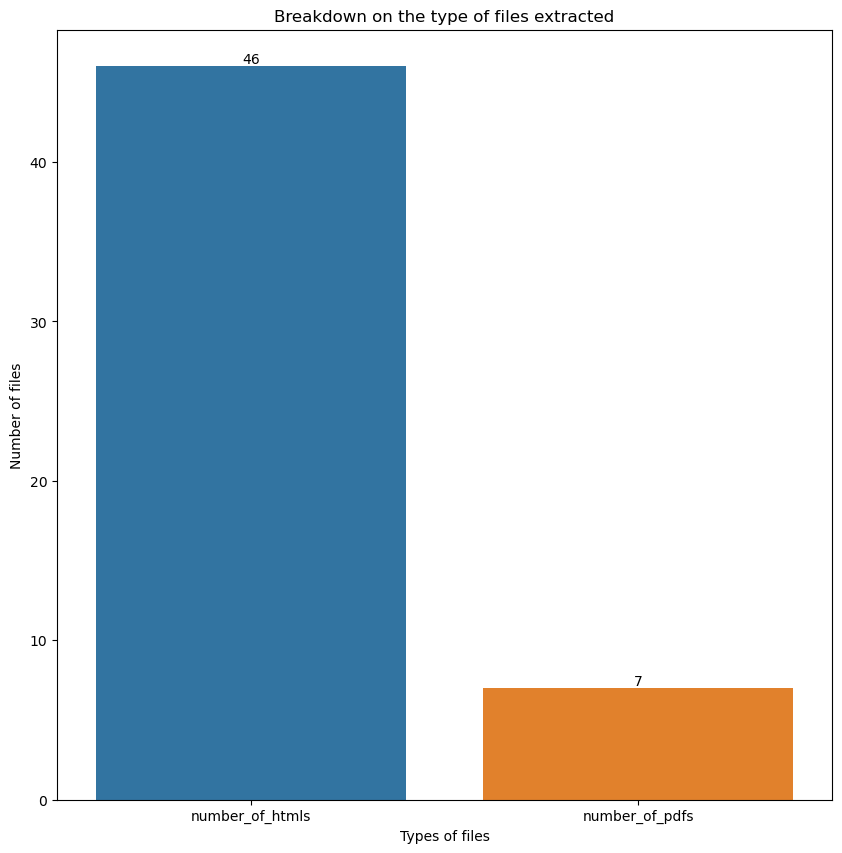

In [200]:
# This is to visualise the number of htmls vs pdf files that we have extracted.

extracted_data = {"number_of_htmls":len(sublinks_with_html), "number_of_pdfs":len(sublinks_with_pdf)}
extracted_stats_df = pd.DataFrame(list(extracted_data.items()),columns = ['type_of_files','num'])

plt.figure(figsize=(10,10))
ax = sns.barplot(extracted_stats_df, x="type_of_files", y="num")
plt.title("Breakdown on the type of files extracted")
plt.xlabel("Types of files")
plt.ylabel("Number of files")
plt.bar_label(ax.containers[0])

**Based on the above visualisation, we can see that there are 46 html files extracted, significantly more than the number of pdfs which is 7.**

**In total, we have extracted 46 + 7 = 53 files which will be used as context for our chatbot.**

In [184]:
import PyPDF2

num_of_pages_pdf = []
names_of_pdf = []

for index in range(len(sublinks_with_pdf)):
    filename = "../extra_data/pdfdoc_"+ str(index) + ".pdf"
    file = open(filename, 'rb') 
    pdfReader = PyPDF2.PdfReader(file)
    total_pages = len(pdfReader.pages)
    name = "pdfdoc_" + str(index)
    names_of_pdf.append(name)
    num_of_pages_pdf.append(total_pages)
    
pdf_data_info = dict(zip(names_of_pdf, num_of_pages_pdf))
pdf_stats_df = pd.DataFrame(list(pdf_data_info.items()),columns = ['name_of_pdf','num_of_pages'])

[Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '7'),
 Text(0, 0, '5'),
 Text(0, 0, '8'),
 Text(0, 0, '11'),
 Text(0, 0, '44')]

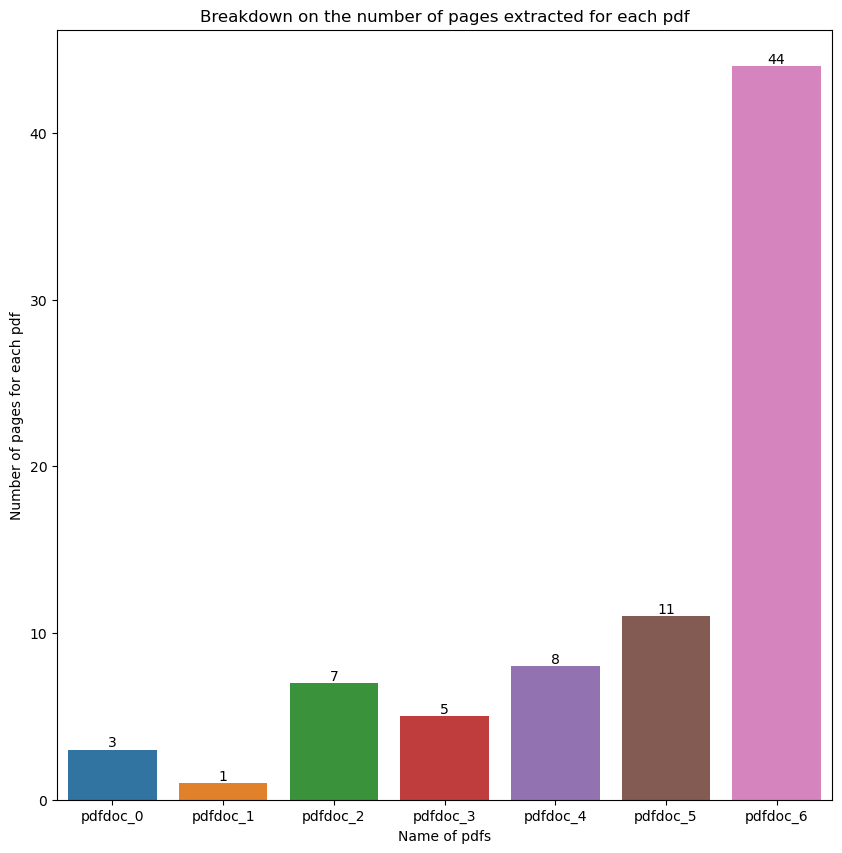

In [201]:
plt.figure(figsize=(10,10))
ax = sns.barplot(pdf_stats_df, x="name_of_pdf", y="num_of_pages")
plt.title("Breakdown on the number of pages extracted for each pdf")
plt.xlabel("Name of pdfs")
plt.ylabel("Number of pages for each pdf")
plt.bar_label(ax.containers[0])

**Based on the visualisation above, we can see that pdfdoc_6 has significantly more number of pages compared to the others. Upon closer inspection on pdfdoc_6, we can see that it is made up of many tables that shows the breakdown of the salary benchmarks by the sectors, and for each sector it is broken down to the age category.** 

**This explains why this particular pdf file has a much higher number of pages compared to the rest.**

![Screenshot of pdfdoc_6](../images/pdfdoc_6_screenshot.png)

In [193]:
num_of_readlines_html = []
names_of_html = []

for index in range(len(sublinks_with_html)):
    filename = "../extra_data/doc_"+ str(index) + ".html"
    file = open(filename, 'rb') 
    total_pages = len(file.readlines())
    name = "doc_" + str(index)
    names_of_html.append(name)
    num_of_readlines_html.append(total_pages)
    
html_data_info = dict(zip(names_of_html, num_of_readlines_html))
html_stats_df = pd.DataFrame(list(html_data_info.items()),columns = ['name_of_html','num_of_readlines'])

[Text(0, 0, '524'),
 Text(0, 0, '507'),
 Text(0, 0, '564'),
 Text(0, 0, '559'),
 Text(0, 0, '788'),
 Text(0, 0, '1389'),
 Text(0, 0, '639'),
 Text(0, 0, '628'),
 Text(0, 0, '504'),
 Text(0, 0, '514'),
 Text(0, 0, '559'),
 Text(0, 0, '1389'),
 Text(0, 0, '631'),
 Text(0, 0, '498'),
 Text(0, 0, '651'),
 Text(0, 0, '1886'),
 Text(0, 0, '799'),
 Text(0, 0, '648'),
 Text(0, 0, '504'),
 Text(0, 0, '509'),
 Text(0, 0, '497'),
 Text(0, 0, '496'),
 Text(0, 0, '508'),
 Text(0, 0, '497'),
 Text(0, 0, '919'),
 Text(0, 0, '771'),
 Text(0, 0, '669'),
 Text(0, 0, '508'),
 Text(0, 0, '775'),
 Text(0, 0, '640'),
 Text(0, 0, '531'),
 Text(0, 0, '1389'),
 Text(0, 0, '639'),
 Text(0, 0, '926'),
 Text(0, 0, '864'),
 Text(0, 0, '499'),
 Text(0, 0, '1389'),
 Text(0, 0, '625'),
 Text(0, 0, '496'),
 Text(0, 0, '1389'),
 Text(0, 0, '919'),
 Text(0, 0, '1389'),
 Text(0, 0, '658'),
 Text(0, 0, '723'),
 Text(0, 0, '624'),
 Text(0, 0, '3429')]

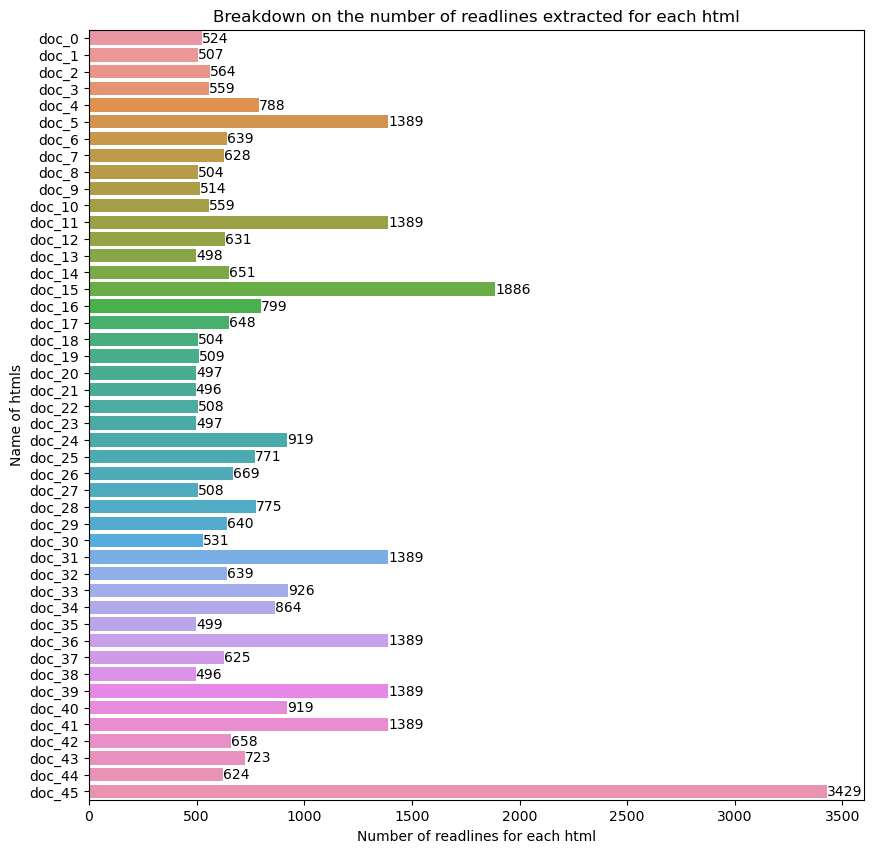

In [206]:
plt.figure(figsize=(10,10))
ax = sns.barplot(html_stats_df, y="name_of_html", x="num_of_readlines")
plt.title("Breakdown on the number of readlines extracted for each html")
plt.xlabel("Number of readlines for each html")
plt.ylabel("Name of htmls")
plt.bar_label(ax.containers[0])

**Based on the above visualisation, we can see that most html files averages at about 500-550 readlines. There were however some exceptions such as doc_15 and doc_45 which had more than 1500 readlines.**

[Click here for creation of chatbot](02_Creation_of_chatbot.ipynb)